In [2]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import json

In [3]:
# Make a reference to the Chicago_Energy_Benchmarking_20240408.csv file path
csv_path = Path("Chicago_Energy_Benchmarking_20240408.csv")

# Import the Chicago_Energy_Benchmarking_202404.csv file as a DataFrame
df = pd.read_csv(csv_path, encoding="utf-8")

# Check the data imported correctly
df.head()

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID
0,2020,252064,Mansueto Library,Submitted Data,1100 E 57th St,60637,2.0,False,HYDE PARK,Library,...,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950,"(41.79221307, -87.59994981)",2020-252064
1,2020,232458,Harper Square Cooperative,Submitted Data,4800 - 4850 S Lake Park Ave,60615,1.0,False,KENWOOD,Multifamily Housing,...,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264,"(41.80747487, -87.59126397)",2020-232458
2,2020,254616,Former Coyne College,Submitted Data,330 N Green St,60607,2.0,False,NEAR WEST SIDE,Office,...,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021,"(41.873335, -87.65102071)",2020-254616
3,2020,103812,400 W Superior St,Submitted Data,400 W Superior St,60654,3.0,False,NEAR NORTH SIDE,Office,...,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901,"(41.89575232, -87.638901)",2020-103812
4,2020,254073,Blue Moon Lofts,Submitted Data,215 N. Aberdeen St.,60607,4.0,False,NEAR WEST SIDE,Multifamily Housing,...,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175,"(41.87429514, -87.65017516)",2020-254073


In [44]:
df.columns

Index(['Data Year', 'ID', 'Property Name', 'Reporting Status', 'Address',
       'ZIP Code', 'Chicago Energy Rating',
       'Exempt From Chicago Energy Rating', 'Community Area',
       'Primary Property Type', 'Gross Floor Area - Buildings (sq ft)',
       'Year Built', '# of Buildings', 'Water Use (kGal)', 'ENERGY STAR Score',
       'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)',
       'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)',
       'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)',
       'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)',
       'Weather Normalized Source EUI (kBtu/sq ft)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'GHG Intensity (kg CO2e/sq ft)', 'Latitude', 'Longitude', 'Location',
       'Row_ID'],
      dtype='object')

In [35]:
min_year= df['Data Year'].min()
max_year= df['Data Year'].max()
print(min_year)
print(max_year)

2014


2022

In [77]:

min_rate= df['Chicago Energy Rating'].min()
max_rate= df['Chicago Energy Rating'].max()
print(min_rate)
print(max_rate)

0.0
4.0


In [41]:
df_22= df[df['Data Year'] == 2022]
df_20= df[df['Data Year'] == 2020]
df_18= df[df['Data Year'] == 2018]
df_14= df[df['Data Year'] == 2014]


In [197]:
exemptdf= df[df['Exempt From Chicago Energy Rating']== False]
exempt= exemptdf.drop_duplicates(subset= ['Address'])
cleaned= exempt.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
q1= cleaned['Site EUI (kBtu/sq ft)'].quantile(0.25)
q3= cleaned['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq= q3- q1

low= q1- 1.5*iq
high= q3+ 1.5 *iq

filter = cleaned[(cleaned['Site EUI (kBtu/sq ft)'] >= low) & (cleaned['Site EUI (kBtu/sq ft)'] <= high)]

reduced_df = filter[["Data Year", "ID", "Property Name", "Address", "Chicago Energy Rating", "Exempt From Chicago Energy Rating",
"Community Area", "Primary Property Type", "Gross Floor Area - Buildings (sq ft)", "Year Built", "Electricity Use (kBtu)",
 "Natural Gas Use (kBtu)","Site EUI (kBtu/sq ft)", "Source EUI (kBtu/sq ft)", "Weather Normalized Site EUI (kBtu/sq ft)",
 "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", "GHG Intensity (kg CO2e/sq ft)", 
 "Latitude", "Longitude"]]
reduced_df.head()



,Data Year,ID,Property Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
1,2020,232458,Harper Square Cooperative,4800 - 4850 S Lake Park Ave,1.0,False,KENWOOD,Multifamily Housing,627680.0,1974.0,16397682.8,43537490.6,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264
2,2020,254616,Former Coyne College,330 N Green St,2.0,False,NEAR WEST SIDE,Office,555524.0,2019.0,28606427.7,2199940.1,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021
3,2020,103812,400 W Superior St,400 W Superior St,3.0,False,NEAR NORTH SIDE,Office,130007.0,1998.0,6489281.3,1493523.2,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901
4,2020,254073,Blue Moon Lofts,215 N. Aberdeen St.,4.0,False,NEAR WEST SIDE,Multifamily Housing,83000.0,1908.0,1614582.3,825006.6,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175
5,2020,254385,"Ambulatory Care Center, St. Bernard Hospital",6307 S STEWART AVE,2.5,False,Englewood,Medical Office,98018.0,2016.0,4204723.5,2236782.3,96.7,211.9,98.0,212.8,775.0,11.6,41.773912,-87.638721


In [162]:
exempt22_df= df_22[df_22['Exempt From Chicago Energy Rating']== False]
exempt20_df= df_20[df_20['Exempt From Chicago Energy Rating']== False]
exempt18_df= df_18[df_18['Exempt From Chicago Energy Rating']== False]
exempt14_df= df_14[df_14['Exempt From Chicago Energy Rating']== False]
exempt20_df

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID
0,2020,252064,Mansueto Library,Submitted Data,1100 E 57th St,60637,2.0,False,HYDE PARK,Library,...,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950,"(41.79221307, -87.59994981)",2020-252064
1,2020,232458,Harper Square Cooperative,Submitted Data,4800 - 4850 S Lake Park Ave,60615,1.0,False,KENWOOD,Multifamily Housing,...,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264,"(41.80747487, -87.59126397)",2020-232458
2,2020,254616,Former Coyne College,Submitted Data,330 N Green St,60607,2.0,False,NEAR WEST SIDE,Office,...,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021,"(41.873335, -87.65102071)",2020-254616
3,2020,103812,400 W Superior St,Submitted Data,400 W Superior St,60654,3.0,False,NEAR NORTH SIDE,Office,...,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901,"(41.89575232, -87.638901)",2020-103812
4,2020,254073,Blue Moon Lofts,Submitted Data,215 N. Aberdeen St.,60607,4.0,False,NEAR WEST SIDE,Multifamily Housing,...,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175,"(41.87429514, -87.65017516)",2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,2020,254174,NaN,Submitted Data,4200 W Diversey Ave,60639,3.0,False,Hermosa,Other,...,64.0,106.7,68.7,112.9,807.5,5.7,41.920398,-87.756200,"(41.9203976, -87.7562)",2020-254174
3579,2020,251529,Lovett Elementary -CPS,Submitted Data,6333 W Bloomingdale Ave,60639,4.0,False,AUSTIN,K-12 School,...,73.8,101.5,78.9,106.9,454.5,5.3,41.912786,-87.783130,"(41.912786, -87.78313)",2020-251529
3580,2020,250114,Zelda Ormes Senior Apartments,Submitted Data,116 W Elm St,60610,4.0,False,NEAR NORTH SIDE,Multifamily Housing,...,85.2,124.1,87.9,125.9,1045.5,6.6,41.903163,-87.631828,"(41.903163, -87.631828)",2020-250114
3581,2020,171887,NaN,Submitted Data,1824 N SPAULDING AVE,60647,4.0,False,LOGAN SQUARE,Multifamily Housing,...,63.0,95.6,67.2,99.3,330.1,5.1,41.920750,-87.701528,"(41.92075046, -87.70152825)",2020-171887


In [163]:
exempt22= exempt22_df.drop_duplicates(subset= ['Address'])
exempt20= exempt20_df.drop_duplicates(subset= ['Address'])
exempt18= exempt18_df.drop_duplicates(subset= ['Address'])
exempt14= exempt14_df.drop_duplicates(subset= ['Address'])
exempt20

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID
0,2020,252064,Mansueto Library,Submitted Data,1100 E 57th St,60637,2.0,False,HYDE PARK,Library,...,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950,"(41.79221307, -87.59994981)",2020-252064
1,2020,232458,Harper Square Cooperative,Submitted Data,4800 - 4850 S Lake Park Ave,60615,1.0,False,KENWOOD,Multifamily Housing,...,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264,"(41.80747487, -87.59126397)",2020-232458
2,2020,254616,Former Coyne College,Submitted Data,330 N Green St,60607,2.0,False,NEAR WEST SIDE,Office,...,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021,"(41.873335, -87.65102071)",2020-254616
3,2020,103812,400 W Superior St,Submitted Data,400 W Superior St,60654,3.0,False,NEAR NORTH SIDE,Office,...,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901,"(41.89575232, -87.638901)",2020-103812
4,2020,254073,Blue Moon Lofts,Submitted Data,215 N. Aberdeen St.,60607,4.0,False,NEAR WEST SIDE,Multifamily Housing,...,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175,"(41.87429514, -87.65017516)",2020-254073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,2020,254174,NaN,Submitted Data,4200 W Diversey Ave,60639,3.0,False,Hermosa,Other,...,64.0,106.7,68.7,112.9,807.5,5.7,41.920398,-87.756200,"(41.9203976, -87.7562)",2020-254174
3579,2020,251529,Lovett Elementary -CPS,Submitted Data,6333 W Bloomingdale Ave,60639,4.0,False,AUSTIN,K-12 School,...,73.8,101.5,78.9,106.9,454.5,5.3,41.912786,-87.783130,"(41.912786, -87.78313)",2020-251529
3580,2020,250114,Zelda Ormes Senior Apartments,Submitted Data,116 W Elm St,60610,4.0,False,NEAR NORTH SIDE,Multifamily Housing,...,85.2,124.1,87.9,125.9,1045.5,6.6,41.903163,-87.631828,"(41.903163, -87.631828)",2020-250114
3581,2020,171887,NaN,Submitted Data,1824 N SPAULDING AVE,60647,4.0,False,LOGAN SQUARE,Multifamily Housing,...,63.0,95.6,67.2,99.3,330.1,5.1,41.920750,-87.701528,"(41.92075046, -87.70152825)",2020-171887


In [164]:
cleaned22= exempt22.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
cleaned20= exempt20.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
cleaned18= exempt18.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
cleaned14= exempt14.dropna(subset=['Electricity Use (kBtu)','Site EUI (kBtu/sq ft)' ])
cleaned18

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID
3602,2018,101420,Chicago Acad-CPS,Submitted,3400 N Austin Ave,60634,2.0,False,DUNNING,K-12 School,...,96.6,149.2,95.1,146.6,2062.6,8.2,41.942538,-87.777370,"(41.94253753, -87.77737003)",2018-101420
3606,2018,160414,Cambria Hotel,Submitted,32 w randolph,60601,4.0,False,LOOP,Hotel,...,52.9,97.2,53.1,97.3,1355.4,5.5,41.885040,-87.628996,"(41.88503972, -87.62899559)",2018-160414
3611,2018,173625,Burnham 600,Submitted,600 W. Jackson Blvd.,60661,4.0,False,NEAR WEST SIDE,Office,...,104.0,175.9,101.5,173.2,1022.3,9.8,41.878018,-87.643191,"(41.87801775, -87.64319149)",2018-173625
3619,2018,175603,Gateway Centre 175603 Building A (Marshalls),Submitted,1701-1741 W. Howard,60626,1.0,False,ROGERS PARK,Strip Mall,...,310.1,719.4,312.3,721.8,2797.5,42.0,42.019356,-87.673890,"(42.019356, -87.67389)",2018-175603
3620,2018,251684,Marine Lead-CPS,Submitted,1920 N Hamlin Ave,60647,2.5,False,LOGAN SQUARE,K-12 School,...,71.4,135.1,69.8,133.3,972.0,7.7,41.915982,-87.722486,"(41.9159824, -87.72248643)",2018-251684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14356,2018,156876,Newberry Library,Submitted,60 W. Walton,60610,2.0,False,NEAR NORTH SIDE,Library,...,95.9,167.5,95.8,167.4,1884.0,9.4,41.900020,-87.630608,"(41.90002028, -87.63060779)",2018-156876
14357,2018,149143,The Residences at 950 West Monroe,Submitted,950 W Monroe St,60607,2.5,False,NEAR WEST SIDE,Multifamily Housing,...,81.8,142.8,81.3,141.4,990.7,8.0,41.873994,-87.651678,"(41.87399385, -87.651678)",2018-149143
14362,2018,255191,Anatomy/Culver,Submitted,1027 East 57th Street,60637,1.0,False,Hyde Park,Laboratory,...,388.6,560.8,377.7,549.2,2140.1,31.9,41.783986,-87.615539,"(41.7839855, -87.6155392)",2018-255191
14363,2018,101871,123 N Wacker,Submitted,123 N Wacker,60606,3.0,False,LOOP,Office,...,50.7,142.1,50.7,142.1,4962.5,8.4,41.884120,-87.636497,"(41.88411984, -87.63649725)",2018-101871


In [165]:
q122= cleaned22['Site EUI (kBtu/sq ft)'].quantile(0.25)
q322= cleaned22['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq22= q322- q122

low22= q122- 1.5*iq22
high22= q322+ 1.5 *iq22

filter22 = cleaned22[(cleaned22['Site EUI (kBtu/sq ft)'] >= low22) & (cleaned22['Site EUI (kBtu/sq ft)'] <= high22)]

In [166]:
q120= cleaned20['Site EUI (kBtu/sq ft)'].quantile(0.25)
q320= cleaned20['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq20= q320- q120

low20= q120- 1.5*iq20
high20= q320+ 1.5 *iq20

filter20 = cleaned20[(cleaned20['Site EUI (kBtu/sq ft)'] >= low20) & (cleaned20['Site EUI (kBtu/sq ft)'] <= high20)]

In [167]:
q118= cleaned18['Site EUI (kBtu/sq ft)'].quantile(0.25)
q318= cleaned18['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq18= q318- q118

low18= q118- 1.5*iq18
high18= q318+ 1.5 *iq18

filter18 = cleaned18[(cleaned18['Site EUI (kBtu/sq ft)'] >= low18) & (cleaned18['Site EUI (kBtu/sq ft)'] <= high18)]


In [168]:
q114= cleaned14['Site EUI (kBtu/sq ft)'].quantile(0.25)
q314= cleaned14['Site EUI (kBtu/sq ft)'].quantile(0.75)

iq14= q314- q114

low14= q114- 1.5*iq14
high14= q314+ 1.5 *iq14

filter14 = cleaned14[(cleaned14['Site EUI (kBtu/sq ft)'] >= low14) & (cleaned14['Site EUI (kBtu/sq ft)'] <= high14)]

In [194]:
filter18

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID
3602,2018,101420,Chicago Acad-CPS,Submitted,3400 N Austin Ave,60634,2.0,False,DUNNING,K-12 School,...,96.6,149.2,95.1,146.6,2062.6,8.2,41.942538,-87.777370,"(41.94253753, -87.77737003)",2018-101420
3606,2018,160414,Cambria Hotel,Submitted,32 w randolph,60601,4.0,False,LOOP,Hotel,...,52.9,97.2,53.1,97.3,1355.4,5.5,41.885040,-87.628996,"(41.88503972, -87.62899559)",2018-160414
3611,2018,173625,Burnham 600,Submitted,600 W. Jackson Blvd.,60661,4.0,False,NEAR WEST SIDE,Office,...,104.0,175.9,101.5,173.2,1022.3,9.8,41.878018,-87.643191,"(41.87801775, -87.64319149)",2018-173625
3620,2018,251684,Marine Lead-CPS,Submitted,1920 N Hamlin Ave,60647,2.5,False,LOGAN SQUARE,K-12 School,...,71.4,135.1,69.8,133.3,972.0,7.7,41.915982,-87.722486,"(41.9159824, -87.72248643)",2018-251684
3626,2018,251223,564 West Randolph,Submitted,564 West Randolph Street,60661,4.0,False,NEAR WEST SIDE,Office,...,98.1,192.8,98.1,192.8,1320.6,11.0,41.884638,-87.642325,"(41.88463844, -87.64232477)",2018-251223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14353,2018,254051,NewCity Retail,Submitted,1457 N Halsted St,60642,2.0,False,Near North Side,Other,...,109.8,271.1,108.8,270.1,10807.7,15.9,41.903838,-87.636680,"(41.9038385, -87.63668)",2018-254051
14356,2018,156876,Newberry Library,Submitted,60 W. Walton,60610,2.0,False,NEAR NORTH SIDE,Library,...,95.9,167.5,95.8,167.4,1884.0,9.4,41.900020,-87.630608,"(41.90002028, -87.63060779)",2018-156876
14357,2018,149143,The Residences at 950 West Monroe,Submitted,950 W Monroe St,60607,2.5,False,NEAR WEST SIDE,Multifamily Housing,...,81.8,142.8,81.3,141.4,990.7,8.0,41.873994,-87.651678,"(41.87399385, -87.651678)",2018-149143
14363,2018,101871,123 N Wacker,Submitted,123 N Wacker,60606,3.0,False,LOOP,Office,...,50.7,142.1,50.7,142.1,4962.5,8.4,41.884120,-87.636497,"(41.88411984, -87.63649725)",2018-101871


In [169]:
fivestar22= filter22[filter22['Chicago Energy Rating']== 5].count()['Chicago Energy Rating']
fourstar22= filter22[filter22['Chicago Energy Rating']== 4].count()['Chicago Energy Rating']
threestar22= filter22[filter22['Chicago Energy Rating']== 3].count()['Chicago Energy Rating']
twotar22= filter22[filter22['Chicago Energy Rating']== 2].count()['Chicago Energy Rating']
onestar22= filter22[filter22['Chicago Energy Rating']== 1].count()['Chicago Energy Rating']
zerostar22= filter22[filter22['Chicago Energy Rating']== 0].count()['Chicago Energy Rating']

In [170]:
fivestar20= filter20[filter20['Chicago Energy Rating']== 5].count()['Chicago Energy Rating']
fourstar20= filter20[filter20['Chicago Energy Rating']== 4].count()['Chicago Energy Rating']
threestar20= filter20[filter20['Chicago Energy Rating']== 3].count()['Chicago Energy Rating']
twotar20= filter20[filter20['Chicago Energy Rating']== 2].count()['Chicago Energy Rating']
onestar20= filter20[filter20['Chicago Energy Rating']== 1].count()['Chicago Energy Rating']
zerostar20= filter20[filter20['Chicago Energy Rating']== 0].count()['Chicago Energy Rating']

In [171]:
fivestar18= filter18[filter18['Chicago Energy Rating']== 5].count()['Chicago Energy Rating']
fourstar18= filter18[filter18['Chicago Energy Rating']== 4].count()['Chicago Energy Rating']
threestar18= filter18[filter18['Chicago Energy Rating']== 3].count()['Chicago Energy Rating']
twotar18= filter18[filter18['Chicago Energy Rating']== 2].count()['Chicago Energy Rating']
onestar18= filter18[filter18['Chicago Energy Rating']== 1].count()['Chicago Energy Rating']
zerostar18= filter18[filter18['Chicago Energy Rating']== 0].count()['Chicago Energy Rating']


In [172]:
stars22= pd.DataFrame({
    'Five Star': [fivestar18, fivestar20, fivestar22],
    'Four Star': [fourstar18,fourstar20, fourstar22 ],
    'Three Star': [threestar18, threestar20, threestar22],
    'Two Stars': [twotar18, twotar20, twotar22], 
    'One Star': [onestar18, onestar20, onestar22],
    'Zero Star': [zerostar18, zerostar20, zerostar22]
})

stars = stars22.rename(index={0 : 2018, 1: 2020, 2: 2022})
stars


,Five Star,Four Star,Three Star,Two Stars,One Star,Zero Star
2018,0,835,313,324,435,37
2020,0,1172,311,281,272,0
2022,0,810,294,287,339,1


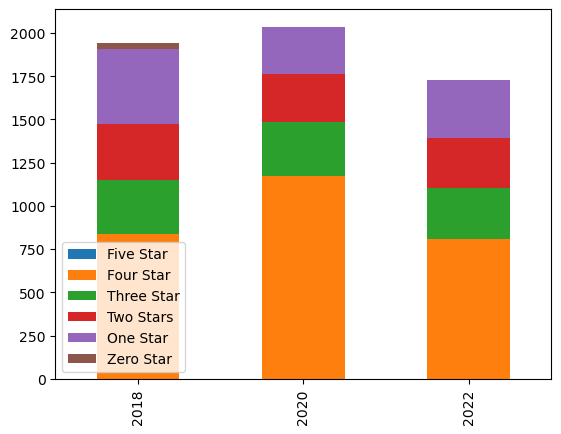

In [173]:
ax = stars.plot.bar(stacked=True)


In [193]:
pract= cleaned18[['Primary Property Type', 'Site EUI (kBtu/sq ft)']]
pract

,Primary Property Type,Site EUI (kBtu/sq ft)
3602,K-12 School,96.6
3606,Hotel,52.9
3611,Office,104.0
3619,Strip Mall,310.1
3620,K-12 School,71.4
...,...,...
14356,Library,95.9
14357,Multifamily Housing,81.8
14362,Laboratory,388.6
14363,Office,50.7


In [179]:
# Assuming you have a DataFrame named 'filter14' with columns including "Site EUI (kBtu/sq ft)" and "Primary Property Type"

# Count non-null values in "Site EUI (kBtu/sq ft)" column and group by "Primary Property Type"
energy18 = filter18.groupby("Primary Property Type")["Site EUI (kBtu/sq ft)"].count()
energy22 = filter22.groupby("Primary Property Type")["Site EUI (kBtu/sq ft)"].count()
energy20 = filter20.groupby("Primary Property Type")["Site EUI (kBtu/sq ft)"].count()
# Print the result
energy18


Primary Property Type
Adult Education                                        3
Automobile Dealership                                  4
Bank Branch                                            3
College/University                                    84
Convention Center                                      1
Courthouse                                             2
Enclosed Mall                                          6
Financial Office                                       3
Fitness Center/Health Club/Gym                         5
Hospital (General Medical & Surgical)                  3
Hotel                                                 74
Ice/Curling Rink                                       1
Indoor Arena                                           1
K-12 School                                          372
Laboratory                                             3
Library                                                7
Lifestyle Center                                       1
Medical O

In [185]:
energy18['Education']= energy18['Adult Education']+ energy18['College/University']+energy18['K-12 School'] + energy18['Pre-school/Daycare']+ energy18['Other - Education']
energy18['Office']= energy18['Bank Branch'] +energy18['Financial Office'] + energy18['Office']
energy18['Healthcare']= energy18['Hospital (General Medical & Surgical)']+ energy18['Laboratory']+energy18['Medical Office'] + energy18['Other - Specialty Hospital']+ energy18['Outpatient Rehabilitation/Physical Therapy']+ energy18['Residential Care Facility']+energy18['Senior Care Community'] 
print(energy18)

Primary Property Type
Adult Education                                        3
Automobile Dealership                                  4
Bank Branch                                            3
College/University                                    84
Convention Center                                      1
Courthouse                                             2
Enclosed Mall                                          6
Financial Office                                       3
Fitness Center/Health Club/Gym                         5
Hospital (General Medical & Surgical)                  3
Hotel                                                 74
Ice/Curling Rink                                       1
Indoor Arena                                           1
K-12 School                                          372
Laboratory                                             3
Library                                                7
Lifestyle Center                                       1
Medical O

In [4]:
# Remove unnecessary columns from the DataFrame and save the new DataFrame
# Only keep: "Data Year", "ID", "Property Name", "Address", "Chicago Energy Rating", "Exempt From Chicago Energy Rating",
#"Community Area", "Primary Property Type", "Gross Floor Area - Buildings (sq ft)", "Year Built", "Electricity Use (kBtu)",
# "Natural Gas Use (kBtu)","Site EUI (kBtu/sq ft)", "Source EUI (kBtu/sq ft)", "Weather Normalized Site EUI (kBtu/sq ft)",
# "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", "GHG Intensity (kg CO2e/sq ft)", 
# "Latitude", "Longitude", 

reduced_df = df[["Data Year", "ID", "Property Name", "Address", "Chicago Energy Rating", "Exempt From Chicago Energy Rating",
"Community Area", "Primary Property Type", "Gross Floor Area - Buildings (sq ft)", "Year Built", "Electricity Use (kBtu)",
 "Natural Gas Use (kBtu)","Site EUI (kBtu/sq ft)", "Source EUI (kBtu/sq ft)", "Weather Normalized Site EUI (kBtu/sq ft)",
 "Weather Normalized Source EUI (kBtu/sq ft)", "Total GHG Emissions (Metric Tons CO2e)", "GHG Intensity (kg CO2e/sq ft)", 
 "Latitude", "Longitude"]]
reduced_df.head()

,Data Year,ID,Property Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
0,2020,252064,Mansueto Library,1100 E 57th St,2.0,False,HYDE PARK,Library,64028.0,2009.0,2384738.9,NaN,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950
1,2020,232458,Harper Square Cooperative,4800 - 4850 S Lake Park Ave,1.0,False,KENWOOD,Multifamily Housing,627680.0,1974.0,16397682.8,43537490.6,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264
2,2020,254616,Former Coyne College,330 N Green St,2.0,False,NEAR WEST SIDE,Office,555524.0,2019.0,28606427.7,2199940.1,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021
3,2020,103812,400 W Superior St,400 W Superior St,3.0,False,NEAR NORTH SIDE,Office,130007.0,1998.0,6489281.3,1493523.2,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901
4,2020,254073,Blue Moon Lofts,215 N. Aberdeen St.,4.0,False,NEAR WEST SIDE,Multifamily Housing,83000.0,1908.0,1614582.3,825006.6,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175


In [20]:
cleaned_df= reduced_df.fillna(0)

In [21]:
new_df= cleaned_df.rename(columns={"Property Name": "Name"})
new_df


,Data Year,ID,Name,Address,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
0,2020,252064,Mansueto Library,1100 E 57th St,2.0,False,HYDE PARK,Library,64028.0,2009.0,2384738.9,0.0,240.8,323.6,246.0,329.9,1160.9,18.1,41.792213,-87.599950
1,2020,232458,Harper Square Cooperative,4800 - 4850 S Lake Park Ave,1.0,False,KENWOOD,Multifamily Housing,627680.0,1974.0,16397682.8,43537490.6,95.5,146.0,100.3,150.7,4871.7,7.8,41.807475,-87.591264
2,2020,254616,Former Coyne College,330 N Green St,2.0,False,NEAR WEST SIDE,Office,555524.0,2019.0,28606427.7,2199940.1,55.5,148.3,56.7,151.8,4581.4,8.2,41.873335,-87.651021
3,2020,103812,400 W Superior St,400 W Superior St,3.0,False,NEAR NORTH SIDE,Office,130007.0,1998.0,6489281.3,1493523.2,61.4,151.8,63.0,154.8,1092.1,8.4,41.895752,-87.638901
4,2020,254073,Blue Moon Lofts,215 N. Aberdeen St.,4.0,False,NEAR WEST SIDE,Multifamily Housing,83000.0,1908.0,1614582.3,825006.6,29.4,64.9,29.6,64.3,295.8,3.6,41.874295,-87.650175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,2022,251598,Joplin Elementary -CPS,7931 S Honore St,1.0,False,AUBURN GRESHAM,K-12 School,77483.0,1957.0,2544345.5,4847890.5,95.4,157.6,99.3,161.8,592.6,7.6,41.749341,-87.669329
24887,2022,159799,Park Edgewater Condominium Association,6101 N Sheridan Road,4.0,False,EDGEWATER,Multifamily Housing,150000.0,1928.0,2019564.1,7254640.6,61.8,88.5,64.5,91.3,651.3,4.3,41.992473,-87.655312
24888,2022,105488,Lake Shore Tower Apartments,5600 N SHERIDAN RD,2.0,False,EDGEWATER,Multifamily Housing,128387.0,1965.0,2801125.0,12528588.7,124.3,170.3,129.9,175.2,1034.4,8.4,41.983886,-87.655342
24889,2022,251565,"Dixon, Arthur -CPS",8306 S St Lawrence Ave,4.0,False,CHATHAM,K-12 School,101627.0,1929.0,733952.0,4679269.9,53.3,68.6,55.2,69.7,345.2,3.4,41.743658,-87.610015


In [22]:
new_df.to_json('benchmarking.json', orient='records', lines=True)

new_df.to_csv("benchmarks.csv",
                  encoding="utf-8", index=False, header=True)